
<center>

## TAREA 5: Analizando un Conjunto de Datos con Pandas

### Curso Propedeutico de Programacion - MCD 2024
##### Profesor Julio Waissman Vilanova

### Jupyter Notebook desarrollado por:
##### Luis Fernando Martinez

</center>

Comenzamos por importar los paquetes de Python que vamos a requerir 🔢 🐼 📊

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

Descargamos los datos correspondientes al Registro de Urgencias del año 2022 directo del URL disponible en el sitio web de la Secretaria de Salud. Fuente de los datos: SS/DGIS, SINAC 2024 ⚕



In [2]:
# Utilizamos la funcion wget para descargar directo de la fuente a nuestro directorio de trabajo.
# !wget -v -O ss_urgencias_2022.zip "http://www.dgis.salud.gob.mx/descargas/datosabiertos/urgencias/Urgencias_2022.zip?v=2023.05.24"

In [3]:
# !unzip /content/ss_urgencias_2022.zip # Utilizamos funcion unzip para descomprimir el archivo .zip (formato de origen).

Con los archivos ya presentes en nuestro directorio de trabajo, iniciamos la extraccion, exploracion y analisis de los datos.

In [4]:
df = pd.read_csv("/content/URGENCIAS.txt", sep='|')
df

<ipython-input-4-4aac7b49a06d>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/URGENCIAS.txt", sep='|')


,ID,CLUES,fechaalta,EDAD,CVEEDAD,SEXO,ENTRESIDENCIA,MUNRESIDENCIA,DERHAB,TIPOURGENCIA,...,MP,AFECPRIN,IRA,PLANEDA,SOBRESEDA,fechaingreso,HORASESTANCIA,MES_ESTADISTICO,hora_ingreso,hora_alta
0,1,TSSSA003732,2022-10-25,7,5,1,28,22,11,2,...,8,A099,8,8,NaN,2022-10-25,000:13,10,13:37,13:50
1,2,ZSSSA013172,2022-11-08,22,5,2,0,999,0,1,...,8,R101,8,8,NaN,2022-11-07,012:40,11,19:40,08:20
2,3,ZSSSA001016,2022-11-05,10,4,2,32,36,0,1,...,8,J029,2,8,NaN,2022-11-05,000:15,11,15:15,15:30
3,4,ZSSSA000695,2022-10-26,17,5,1,32,22,0,2,...,8,S602,8,8,NaN,2022-10-26,000:54,10,10:30,11:24
4,5,ZSSSA000572,2022-11-02,18,5,2,32,19,11,2,...,8,Z349,8,8,NaN,2022-11-02,000:29,11,06:41,07:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7074266,7074267,DFSSA004026,2022-01-08,86,5,2,99,998,99,2,...,8,U071,8,8,NaN,2022-01-08,99:99,1,99:99,99:99
7074267,7074268,DFSSA004026,2022-01-08,11,5,1,99,998,99,2,...,8,J46X,8,8,NaN,2022-01-08,99:99,1,99:99,99:99
7074268,7074269,DFSSA004026,2022-01-08,30,5,1,99,998,99,2,...,8,U072,8,8,NaN,2022-01-08,99:99,1,99:99,99:99
7074269,7074270,DFSSA004026,2022-01-09,26,5,2,99,998,99,2,...,8,U072,8,8,NaN,2022-01-09,99:99,1,99:99,99:99


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7074271 entries, 0 to 7074270
Data columns (total 23 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ID               int64  
 1   CLUES            object 
 2   fechaalta        object 
 3   EDAD             int64  
 4   CVEEDAD          int64  
 5   SEXO             int64  
 6   ENTRESIDENCIA    int64  
 7   MUNRESIDENCIA    int64  
 8   DERHAB           object 
 9   TIPOURGENCIA     int64  
 10  MOTATE           int64  
 11  TIPOCAMA         int64  
 12  ENVIADOA         int64  
 13  MP               int64  
 14  AFECPRIN         object 
 15  IRA              int64  
 16  PLANEDA          object 
 17  SOBRESEDA        float64
 18  fechaingreso     object 
 19  HORASESTANCIA    object 
 20  MES_ESTADISTICO  int64  
 21  hora_ingreso     object 
 22  hora_alta        object 
dtypes: float64(1), int64(13), object(9)
memory usage: 1.2+ GB


Despues de obtener una nocion del contenido, la cantidad y los tipos de dato, se procede a seleccionar las caracteristicas mas relevantes para este analisis e indizar por fecha. Cabe mencionar que el dataset es de 2022 unicamente, la Secretaria de Salud los separa por año, razon por la cual solo sera necesario filtrar instancias/observaciones de 2021 en las cuales el alta del paciente fue hasta 2022. Se tomara fecha de ingreso como referencia 📅

De acorde al documento de Descriptores de la Secretaria de Salud para los datos de Urgencias 2022, el identificador de Entidad para Sonora es el 26. Enlace: http://www.dgis.salud.gob.mx/descargas/datosabiertos/urgencias/Descriptores_Base_de_Datos_URGENCIAS_2022.xlsx?v=2023.05.23



In [6]:
# Se eliminan caracteristicas no relevantes para el analisis
# En su mayoria, identificadores alfanumericos utilizados por la SS
df_urgencias = df.drop(columns=["CLUES","CVEEDAD","AFECPRIN","MP","IRA","PLANEDA","SOBRESEDA",
                                "MES_ESTADISTICO", "ENVIADOA", "DERHAB", "TIPOCAMA","MUNRESIDENCIA"])

In [7]:
# Se eliminan registros con horas de ingreso fuera del rango posible de las 24 hrs
df_urgencias = df_urgencias[df_urgencias["hora_ingreso"].str.replace(":","").astype(int)<=2359]
df_urgencias

,ID,fechaalta,EDAD,SEXO,ENTRESIDENCIA,TIPOURGENCIA,MOTATE,fechaingreso,HORASESTANCIA,hora_ingreso,hora_alta
0,1,2022-10-25,7,1,28,2,2,2022-10-25,000:13,13:37,13:50
1,2,2022-11-08,22,2,0,1,1,2022-11-07,012:40,19:40,08:20
2,3,2022-11-05,10,2,32,1,2,2022-11-05,000:15,15:15,15:30
3,4,2022-10-26,17,1,32,2,2,2022-10-26,000:54,10:30,11:24
4,5,2022-11-02,18,2,32,2,2,2022-11-02,000:29,06:41,07:10
...,...,...,...,...,...,...,...,...,...,...,...
7074258,7074259,2022-02-08,23,2,21,2,3,2022-02-08,000:40,07:40,08:20
7074259,7074260,2022-03-17,38,2,21,2,2,2022-03-17,000:10,16:30,16:40
7074260,7074261,2022-03-24,53,2,21,2,2,2022-03-24,000:30,12:00,12:30
7074261,7074262,2022-02-08,34,2,21,2,2,2022-02-08,000:20,10:00,10:20


In [8]:
# Se genera Series derivada de las columnas fechaingreso y hora_ingreso para convertir a datetime e indizar DataFrame
# Se opto por datetime deliberadamente, puesto que el tipo de dato timestamp se representa como int64 en Pandas
datetime_idx_series = pd.to_datetime(df_urgencias["fechaingreso"] + " " + df_urgencias["hora_ingreso"],
                                     format='%Y-%m-%d %H:%M')
df_urgencias.set_index(datetime_idx_series, inplace=True)
df_urgencias = df_urgencias.sort_index()
df_urgencias

,ID,fechaalta,EDAD,SEXO,ENTRESIDENCIA,TIPOURGENCIA,MOTATE,fechaingreso,HORASESTANCIA,hora_ingreso,hora_alta
2021-11-16 11:26:00,112951,2022-01-02,36,1,32,2,2,2021-11-16,999:59,11:26,11:35
2021-11-30 12:00:00,3241512,2022-01-01,94,2,12,1,2,2021-11-30,773:30,12:00,17:30
2021-12-01 10:51:00,112960,2022-01-02,24,1,32,2,2,2021-12-01,760:03,10:51,02:54
2021-12-03 13:53:00,2821529,2022-01-03,1,1,25,1,4,2021-12-03,745:52,13:53,15:45
2021-12-05 16:39:00,517897,2022-01-18,34,1,32,2,2,2021-12-05,999:59,16:39,00:01
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 23:51:00,4936848,2022-12-31,20,2,11,2,3,2022-12-31,000:08,23:51,23:59
2022-12-31 23:54:00,2150886,2022-12-31,40,2,8,1,2,2022-12-31,000:05,23:54,23:59
2022-12-31 23:57:00,2241412,2022-12-31,29,1,19,1,1,2022-12-31,000:01,23:57,23:58
2022-12-31 23:58:00,2240200,2022-12-31,36,2,19,1,2,2022-12-31,000:01,23:58,23:59


In [9]:
# Se filtran los registros donde el ingreso sucedio en 2021.
df_urgencias = df_urgencias[df_urgencias.index >= datetime.datetime(2022, 1, 1)]
df_urgencias

,ID,fechaalta,EDAD,SEXO,ENTRESIDENCIA,TIPOURGENCIA,MOTATE,fechaingreso,HORASESTANCIA,hora_ingreso,hora_alta
2022-01-01 00:00:00,3943509,2022-01-02,3,2,14,1,2,2022-01-01,026:41,00:00,02:41
2022-01-01 00:00:00,3925098,2022-01-02,16,1,14,1,2,2022-01-01,032:34,00:00,08:34
2022-01-01 00:00:00,3925055,2022-01-01,48,1,14,1,2,2022-01-01,006:35,00:00,06:35
2022-01-01 00:00:00,3925099,2022-01-02,27,2,14,1,2,2022-01-01,032:29,00:00,08:29
2022-01-01 00:00:00,3938768,2022-01-01,16,1,14,1,2,2022-01-01,022:39,00:00,22:39
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 23:51:00,4936848,2022-12-31,20,2,11,2,3,2022-12-31,000:08,23:51,23:59
2022-12-31 23:54:00,2150886,2022-12-31,40,2,8,1,2,2022-12-31,000:05,23:54,23:59
2022-12-31 23:57:00,2241412,2022-12-31,29,1,19,1,1,2022-12-31,000:01,23:57,23:58
2022-12-31 23:58:00,2240200,2022-12-31,36,2,19,1,2,2022-12-31,000:01,23:58,23:59


In [10]:
# Se filtran los registros para quedarnos con aquellos correspondientes al estado de Sonora (ENTRESIDENCIA 26)
df_urgencias = df_urgencias[df_urgencias["ENTRESIDENCIA"] == 26]
# Se eliminan columnas que contienen datos redundantes (fecha y hora en indice, entidad seria Sonora para todo)
df_urgencias = df_urgencias.drop(columns=["fechaingreso","hora_ingreso","fechaalta","ID","ENTRESIDENCIA"])
df_urgencias

,EDAD,SEXO,TIPOURGENCIA,MOTATE,HORASESTANCIA,hora_alta
2022-01-01 00:10:00,3,2,2,2,000:35,00:45
2022-01-01 00:11:00,36,1,2,1,000:10,00:21
2022-01-01 00:15:00,70,1,1,2,000:33,00:48
2022-01-01 00:20:00,47,2,2,2,000:40,01:00
2022-01-01 00:24:00,13,2,1,4,006:52,07:16
...,...,...,...,...,...,...
2022-12-31 23:10:00,29,2,2,3,000:06,23:16
2022-12-31 23:14:00,5,2,1,4,000:02,23:16
2022-12-31 23:15:00,62,2,2,2,000:10,23:25
2022-12-31 23:20:00,24,1,1,1,000:15,23:35


In [11]:
# Renombramos algunas columnas para mayor claridad del contenido
df_urgencias = df_urgencias.rename(columns={"EDAD":"edad", "SEXO":"sexo",
                                            "MOTATE":"motivo_atencion",
                                            "TIPOURGENCIA":"tipo_urgencia","HORASESTANCIA":"hrs_estancia",
                                            "fechaalta":"fecha_alta"})

# Mapeamos los IDs numericos de variables cualitativas (e.g. tipo_urgencia)
# Se utilizan las clasificaciones indicadas en el documento de Descriptores
df_urgencias['sexo'] = df_urgencias['sexo'].map({0:"No Especificado", 1:"Masculino", 2:"Femenino",
                                                 3:"Intersexual", 9:"Se Ignora"})

df_urgencias['tipo_urgencia'] = df_urgencias['tipo_urgencia'].map({1:"Calificada", 2:"No Calificada",
                                                                   9:"No Especificado"})

df_urgencias['motivo_atencion'] = df_urgencias['motivo_atencion'].map({1:"Accidente/Violencia", 2:"Medica", 3:"Gineco-Obs",
                                                 3:"Pediatrico", 9:"No Especificado"})

In [12]:
df_urgencias

,edad,sexo,tipo_urgencia,motivo_atencion,hrs_estancia,hora_alta
2022-01-01 00:10:00,3,Femenino,No Calificada,Medica,000:35,00:45
2022-01-01 00:11:00,36,Masculino,No Calificada,Accidente/Violencia,000:10,00:21
2022-01-01 00:15:00,70,Masculino,Calificada,Medica,000:33,00:48
2022-01-01 00:20:00,47,Femenino,No Calificada,Medica,000:40,01:00
2022-01-01 00:24:00,13,Femenino,Calificada,NaN,006:52,07:16
...,...,...,...,...,...,...
2022-12-31 23:10:00,29,Femenino,No Calificada,Pediatrico,000:06,23:16
2022-12-31 23:14:00,5,Femenino,Calificada,NaN,000:02,23:16
2022-12-31 23:15:00,62,Femenino,No Calificada,Medica,000:10,23:25
2022-12-31 23:20:00,24,Masculino,Calificada,Accidente/Violencia,000:15,23:35


In [20]:
df_urgencias['edad'].values

array([ 3, 36, 70, ..., 62, 24,  2])

In [22]:
df_urgencias.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179012 entries, 2022-01-01 00:10:00 to 2022-12-31 23:45:00
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   edad             179012 non-null  int64 
 1   sexo             179012 non-null  object
 2   tipo_urgencia    179012 non-null  object
 3   motivo_atencion  149402 non-null  object
 4   hrs_estancia     179012 non-null  object
 5   hora_alta        179012 non-null  object
dtypes: int64(1), object(5)
memory usage: 9.6+ MB


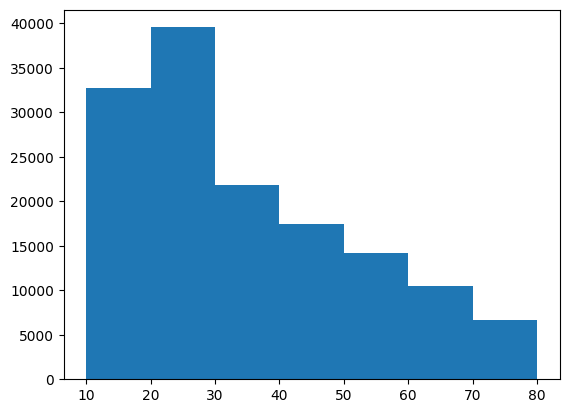

In [27]:
edades = df_urgencias['edad'].values
plt.hist(edades, bins=[10, 20, 30, 40, 50, 60, 70, 80])
plt.show()

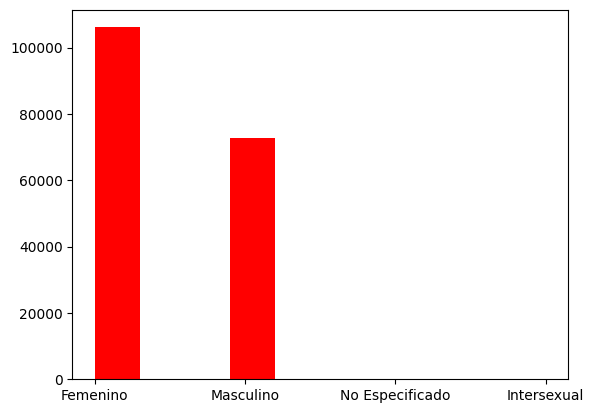

In [29]:
sexo = df_urgencias['sexo'].values
plt.hist(sexo, color="r")
plt.show()

Como conclusiones simples, podemos observar que:



1.   Hubo mas urgencias para personas de edades de: 20 años.
2.   Las personas del sexo Femenino tuvieron mas urgencias.
3.   El mes con mas urgencias del año fue:



